## Load the data

In [12]:
import pandas as pd
import numpy as np

In [13]:
import sys
sys.path.append('src/features')

from customplots import *

In [14]:
train = pd.read_csv('data/processed/train.csv')
train.set_index('icustay_id', inplace=True)

print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20885 entries, 228357 to 258400
Columns: 508 entries, HeartRate_Min to GENDER_AGE_ICD9DIAG
dtypes: float64(508)
memory usage: 81.1 MB
None


,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,DiasBP_Max,DiasBP_Mean,MeanBP_Min,...,ETHNICITY_AGE_GROUP,AGE_GROUP_GENDER,AGE_GROUP_ADMISSION_TYPE,AGE_GROUP_INSURANCE,AGE_GROUP_RELIGION,AGE_GROUP_MARITAL_STATUS,AGE_GROUP_ETHNICITY,GENDER_ICD9DIAG,AGE_ICD9DIAG,GENDER_AGE_ICD9DIAG
icustay_id,,,,,,,,,,,,,,,,,,,,,
228357,1.33218,1.948876,2.403148,-1.006425,-1.021078,-0.772756,-0.202861,0.088173,-0.127848,0.189415,...,-0.137465,0.029527,0.361440,0.054872,0.121116,-0.005283,-0.127987,-0.713200,0.244668,-0.436216
221004,-0.46234,0.234689,-0.405068,-0.127652,-1.279621,-0.763765,0.399285,-0.764372,0.202969,0.117851,...,-1.354388,-1.250569,-0.919620,-1.385577,1.825801,-1.307475,-1.354834,-0.213203,-0.275901,-0.257408
296315,0.78002,-0.353032,0.437012,-0.186237,-0.547081,-0.392030,0.055202,-1.137360,-0.532373,0.547234,...,-0.050633,-0.035086,0.364020,0.073752,0.136510,-0.345261,-0.066353,-0.085663,-0.280623,-0.277103
245557,0.43492,1.116271,0.917094,-0.420577,-0.676353,-0.749047,-1.235111,0.034889,-1.922454,-0.597786,...,0.160014,0.317795,-1.747893,0.113781,0.223111,-0.190493,0.151924,-0.350400,-0.332814,-0.285052
292786,0.71100,0.430596,0.744087,-1.182180,-0.503991,-1.047845,-1.235111,-1.563633,-1.922454,-0.884041,...,0.727670,0.817568,1.080807,0.801318,1.366617,0.408960,0.769847,-0.658985,-0.394405,-0.048078


In [15]:
test = pd.read_csv('data/processed/test.csv')
test.set_index('icustay_id', inplace=True)
print(test.info())
test.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5221 entries, 286120 to 286384
Columns: 507 entries, HeartRate_Min to GENDER_AGE_ICD9DIAG
dtypes: float64(507)
memory usage: 20.2 MB
None


,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,DiasBP_Max,DiasBP_Mean,MeanBP_Min,...,ETHNICITY_AGE_GROUP,AGE_GROUP_GENDER,AGE_GROUP_ADMISSION_TYPE,AGE_GROUP_INSURANCE,AGE_GROUP_RELIGION,AGE_GROUP_MARITAL_STATUS,AGE_GROUP_ETHNICITY,GENDER_ICD9DIAG,AGE_ICD9DIAG,GENDER_AGE_ICD9DIAG
icustay_id,,,,,,,,,,,,,,,,,,,,,
286120,0.02080,-0.010194,0.022425,0.399611,-0.762534,-0.099920,0.227244,-0.657804,-0.368620,0.332543,...,-1.977046,-2.044903,-1.613668,-2.071710,-1.779702,-1.988831,-1.975180,-0.431932,-0.336469,-0.330581
248206,0.60747,0.234689,0.550471,0.546073,1.413541,1.248266,0.184233,0.221383,0.806786,0.296761,...,-0.616181,-0.186294,-0.247581,-0.519250,-0.709822,-0.449908,-0.601302,-0.661519,-0.363559,-0.324719
293175,-0.80744,0.724457,0.140758,0.048102,2.383079,0.063354,-0.374902,0.461162,-0.846234,0.046288,...,0.189406,0.324163,0.759620,0.141549,0.227938,0.817112,0.170832,0.111219,1.300563,1.510724
240974,0.02080,-1.528474,-0.983438,0.399611,-0.934897,-0.663219,-0.202861,-1.989905,-1.489938,0.117851,...,0.863440,1.215591,1.147238,1.122199,1.339455,1.399983,0.866515,1.545429,1.180824,0.947296
202015,0.26237,-0.867288,-0.563214,-0.391284,-1.365803,-1.280389,-0.159850,-0.471309,-0.765732,-0.132622,...,-0.440379,-0.320070,-0.120386,0.376855,-0.394457,-0.576380,-0.428330,-0.218762,0.725579,0.792913


In [16]:
target = 'HOSPITAL_EXPIRE_FLAG'
y = train[target]
X_train = train.drop(target, axis=1)
X_test = test
print(X_train.shape)
print(X_test.shape)

(20885, 507)
(5221, 507)


In [17]:
feature_names = X_test.columns

## Base line Knn model

In [18]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import KFold

from sklearn.metrics import roc_auc_score

In [19]:
model_knn_bl = KNeighborsClassifier()
splitter = KFold(n_splits=5, random_state=None, shuffle=True)

metrics = []
for train_index, val_index in splitter.split(train):
    train_df, val_df = train.iloc[train_index], train.iloc[val_index] 
    
    model_knn_bl.fit(train_df[feature_names], train_df[target])
    predictions = model_knn_bl.predict_proba(val_df[feature_names])
    metrics.append(roc_auc_score(val_df[target], predictions[:,1]))

In [20]:
print(metrics)

[0.7707025257490036, 0.810343581945197, 0.8177782000020177, 0.781149248451704, 0.7959733300392933]


In [21]:
model_knn_bl.fit(train[feature_names], train[target])
y_train_hat_knn_bl = model_knn_bl.predict_proba(train[feature_names])

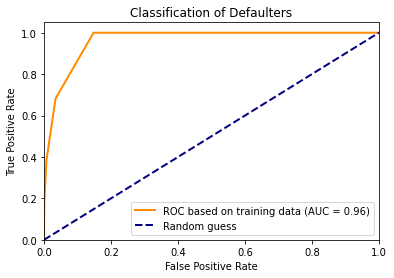

In [22]:
roc_curve_plot(train[target], y_train_hat_knn_bl[:,1])

The model is doing it so bad with un observed data

In [23]:
y_test_hat_knn_bl = model_knn_bl.predict_proba(test[feature_names])

test_predictions_submit = pd.DataFrame({"icustay_id": test.index, "HOSPITAL_EXPIRE_FLAG": y_test_hat_knn_bl[:,1]})
test_predictions_submit.to_csv("data/outputs/knn_bl.csv", index = False)

### Grid search

In [8]:
from sklearn.model_selection import RandomizedSearchCV

In [31]:
parameters1 = {'n_neighbors' : [1, 5, 10, 40, 60, 80, 100, 200, 500, 1000], 
               'weights' : ['uniform', 'distance'],
               'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'p': [1,2]}

knn_gs1 = RandomizedSearchCV(KNeighborsClassifier(), 
                             parameters1, 
                             random_state = 0, 
                             scoring = 'roc_auc',
                             cv = 5,
                             verbose = 3)

In [32]:
knn_gs1.fit(train[feature_names], train[target])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END algorithm=kd_tree, n_neighbors=10, p=1, weights=uniform;, score=0.721 total time= 1.1min
[CV 2/5] END algorithm=kd_tree, n_neighbors=10, p=1, weights=uniform;, score=0.727 total time= 1.1min
[CV 3/5] END algorithm=kd_tree, n_neighbors=10, p=1, weights=uniform;, score=0.752 total time= 1.1min
[CV 4/5] END algorithm=kd_tree, n_neighbors=10, p=1, weights=uniform;, score=0.784 total time= 1.1min
[CV 5/5] END algorithm=kd_tree, n_neighbors=10, p=1, weights=uniform;, score=0.772 total time= 1.1min
[CV 1/5] END algorithm=brute, n_neighbors=40, p=2, weights=uniform;, score=0.770 total time=   1.4s
[CV 2/5] END algorithm=brute, n_neighbors=40, p=2, weights=uniform;, score=0.798 total time=   1.3s
[CV 3/5] END algorithm=brute, n_neighbors=40, p=2, weights=uniform;, score=0.802 total time=   1.4s
[CV 4/5] END algorithm=brute, n_neighbors=40, p=2, weights=uniform;, score=0.848 total time=   1.4s
[CV 5/5] END algorithm=brute,

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'n_neighbors': [1, 5, 10, 40, 60, 80,
                                                        100, 200, 500, 1000],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=0, scoring='roc_auc', verbose=3)

In [34]:
print(knn_gs1.best_params_)

{'weights': 'uniform', 'p': 2, 'n_neighbors': 80, 'algorithm': 'ball_tree'}


In [35]:
model_knn_m1 = KNeighborsClassifier(weights = 'uniform', p = 2, n_neighbors = 80, algorithm = 'ball_tree')
splitter = KFold(n_splits=5, random_state=None, shuffle=True)

metrics = []
for train_index, val_index in splitter.split(train):
    train_df, val_df = train.iloc[train_index], train.iloc[val_index] 
    
    model_knn_m1.fit(train_df[feature_names], train_df[target])
    predictions = model_knn_m1.predict_proba(val_df[feature_names])
    metrics.append(roc_auc_score(val_df[target], predictions[:,1]))
    
print(metrics)

[0.8367071939344911, 0.8275069190596132, 0.8441012554563543, 0.8124607025386614, 0.8434183068730071]


In [10]:
model_knn_m1.fit(train[feature_names], train[target])
y_train_hat_knn_m1 = model_knn_m1.predict_proba(train[feature_names])

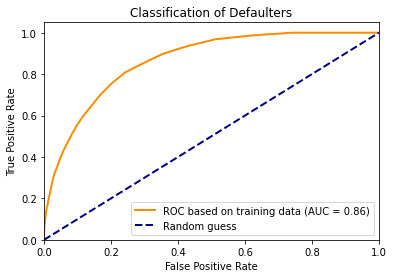

In [11]:
roc_curve_plot(train[target], y_train_hat_knn_m1[:,1])

In [12]:
y_test_hat_knn_m1 = model_knn_m1.predict_proba(test[feature_names])

test_predictions_submit = pd.DataFrame({"icustay_id": test.index, "HOSPITAL_EXPIRE_FLAG": y_test_hat_knn_m1[:,1]})
test_predictions_submit.to_csv("data/outputs/knn_m1.csv", index = False)

In [14]:
parameters2 = {'n_neighbors' : [60, 70, 80, 90, 100, 200, 500, 1000], 
               'weights' : ['uniform', 'distance'],
               'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'p': [1,2]}

knn_gs2 = RandomizedSearchCV(KNeighborsClassifier(), 
                             parameters2, 
                             random_state = 0, 
                             scoring = 'roc_auc',
                             cv = 5,
                             verbose = 3)

In [15]:
knn_gs2.fit(train[feature_names], train[target])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END algorithm=ball_tree, n_neighbors=500, p=2, weights=uniform;, score=0.803 total time=  51.9s
[CV 2/5] END algorithm=ball_tree, n_neighbors=500, p=2, weights=uniform;, score=0.818 total time=  51.7s
[CV 3/5] END algorithm=ball_tree, n_neighbors=500, p=2, weights=uniform;, score=0.829 total time=  51.7s
[CV 4/5] END algorithm=ball_tree, n_neighbors=500, p=2, weights=uniform;, score=0.873 total time=  51.9s
[CV 5/5] END algorithm=ball_tree, n_neighbors=500, p=2, weights=uniform;, score=0.861 total time=  52.2s
[CV 1/5] END algorithm=brute, n_neighbors=200, p=1, weights=uniform;, score=0.798 total time=  27.2s
[CV 2/5] END algorithm=brute, n_neighbors=200, p=1, weights=uniform;, score=0.799 total time=  27.2s
[CV 3/5] END algorithm=brute, n_neighbors=200, p=1, weights=uniform;, score=0.816 total time=  27.2s
[CV 4/5] END algorithm=brute, n_neighbors=200, p=1, weights=uniform;, score=0.862 total time=  27.2s
[CV 5/5] E

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'n_neighbors': [60, 70, 80, 90, 100,
                                                        200, 500, 1000],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=0, scoring='roc_auc', verbose=3)

In [17]:

print(knn_gs2.best_params_)

{'weights': 'uniform', 'p': 2, 'n_neighbors': 500, 'algorithm': 'ball_tree'}


In [18]:
model_knn_m2 = KNeighborsClassifier(weights = 'uniform', p = 2, n_neighbors = 500, algorithm = 'ball_tree')
splitter = KFold(n_splits=5, random_state=None, shuffle=True)

metrics = []
for train_index, val_index in splitter.split(train):
    train_df, val_df = train.iloc[train_index], train.iloc[val_index] 
    
    model_knn_m2.fit(train_df[feature_names], train_df[target])
    predictions = model_knn_m2.predict_proba(val_df[feature_names])
    metrics.append(roc_auc_score(val_df[target], predictions[:,1]))
    
print(metrics)

[0.8341287797895612, 0.829284237600644, 0.8383567619163237, 0.8513214333101236, 0.8457614453429867]


In [20]:
model_knn_m2.fit(train[feature_names], train[target])
y_train_hat_knn_m2 = model_knn_m2.predict_proba(train[feature_names])

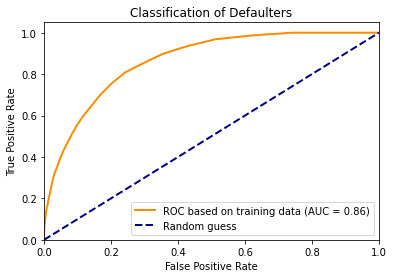

In [21]:
roc_curve_plot(train[target], y_train_hat_knn_m1[:,1])

In [22]:
y_test_hat_knn_m2 = model_knn_m2.predict_proba(test[feature_names])

test_predictions_submit = pd.DataFrame({"icustay_id": test.index, "HOSPITAL_EXPIRE_FLAG": y_test_hat_knn_m2[:,1]})
test_predictions_submit.to_csv("data/outputs/knn_m2.csv", index = False)